# Lab 3: CNN for Handwritted Digit Recognition


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Input, Flatten, Dense, BatchNormalization, Conv2D, MaxPool2D, Activation, MaxPooling2D, Dropout,AveragePooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

import matplotlib.pyplot as plt
np.random.seed(42)
#tf.random.set_seed(42)

Downloading the MNIST dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

6


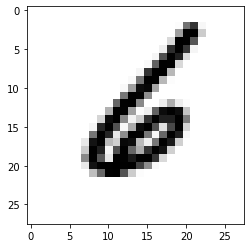

In [5]:
image_index = 999
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

Preprocessing the data

In [6]:
#Reshaping the array to 4-dims
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Converting the type to 'float'
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input value (input value range: {0,255})
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


Defining the CNN model

In [7]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3),padding='same',strides=1, input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

model description

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5488)              0         
                                                                 
 dense (Dense)               (None, 128)               702592    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

Running the CNN model

In [9]:
optimizer = keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    )
model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train, epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 43s 28ms/step - loss: 0.2052 - accuracy: 0.9371 - val_loss: 0.0775 - val_accuracy: 0.9772
Epoch 2/5
1500/1500 [==============================] - 42s 28ms/step - loss: 0.0737 - accuracy: 0.9771 - val_loss: 0.0570 - val_accuracy: 0.9829
Epoch 3/5
1500/1500 [==============================] - 54s 36ms/step - loss: 0.0502 - accuracy: 0.9841 - val_loss: 0.0533 - val_accuracy: 0.9841
Epoch 4/5
1500/1500 [==============================] - 43s 28ms/step - loss: 0.0377 - accuracy: 0.9888 - val_loss: 0.0479 - val_accuracy: 0.9861
Epoch 5/5
1500/1500 [==============================] - 41s 28ms/step - loss: 0.0305 - accuracy: 0.9904 - val_loss: 0.0503 - val_accuracy: 0.9858


Reference:

[1] [Keras loss functions](https://keras.io/api/losses/)

[2] [Keras optimizers](https://keras.io/api/optimizers/)

[3] [Keras metrics](https://keras.io/api/metrics/)

Evaluate the model

In [10]:
model.metrics_names

['loss', 'accuracy']

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0416 - accuracy: 0.9866


[0.04164006933569908, 0.9865999817848206]

conv2d
[[[-0.46759373]
  [ 0.1690181 ]
  [ 0.22784857]]

 [[-0.40822056]
  [-0.17680134]
  [ 0.22089545]]

 [[-0.15131451]
  [-0.26839954]
  [ 0.06029794]]]
max_pooling2d
flatten
dense
dropout
dense_1


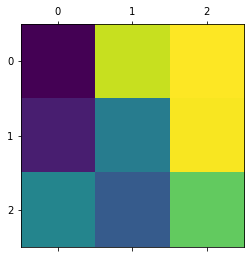

In [12]:
for layer in model.layers:
    print(layer.name)
    if 'conv' not in layer.name:
        continue
    filters, biases = layer.get_weights()
    plt.matshow(filters[:,:,:,0].reshape(3,3))
    print(filters[:,:,:,0])

In [13]:
def plotloss(history,both = True):
    plt.plot(history.history['loss'])
    if both:
        plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    if both:
        plt.legend(['train', 'validation'])
    plt.show()

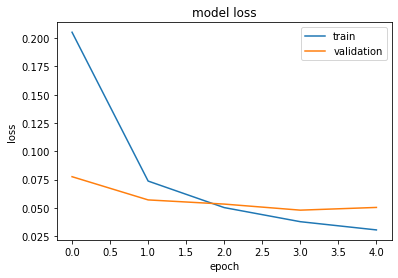

In [14]:
plotloss(history,True)

1/1 [==============================] - 0s 197ms/step
(1, 10)
0 4.4491233e-09
1 2.6045154e-07
2 3.337241e-08
3 2.0040011e-12
4 0.99999774
5 1.3402895e-09
6 1.3861986e-06
7 8.5658286e-08
8 2.8924227e-09
9 4.4525748e-07
--------------
4
4


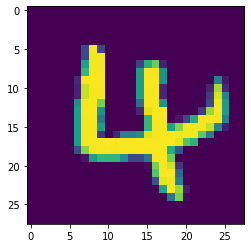

In [15]:
image_index = 1253
plt.imshow(x_test[image_index].reshape(28, 28))#,cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.shape)
for i in range(pred.shape[1]):
    print (i,pred[0,i])
#print(pred)
print('--------------')
print(pred.argmax())
print(y_test[image_index])

## Lab
### Task #1
- Implement LeNet on this task (the final layer should be softmax)
- Plot the loss after each epoch
- Display the kernel/filters of the $1^{st}$ conv layer
- Show the performance 
<img src='lenet.png'>

#### Resources
- https://keras.io/
- https://www.tensorflow.org/

Start your code here:
    

Epoch 1/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1873 - accuracy: 0.9428 - val_loss: 0.0526 - val_accuracy: 0.9832
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0567 - accuracy: 0.9819 - val_loss: 0.0435 - val_accuracy: 0.9855
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0398 - accuracy: 0.9871 - val_loss: 0.0381 - val_accuracy: 0.9866
Epoch 4/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0305 - accuracy: 0.9901 - val_loss: 0.0379 - val_accuracy: 0.9880
Epoch 5/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0242 - accuracy: 0.9924 - val_loss: 0.0489 - val_accuracy: 0.9860
Epoch 6/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0468 - val_accuracy: 0.9884
Epoch 7/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0170 - accuracy: 0.9946 - val_loss: 0.0416 -

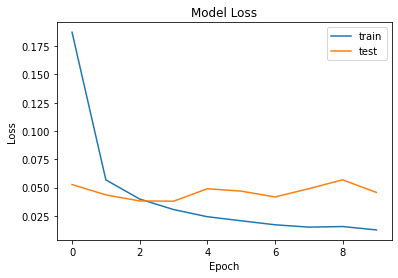

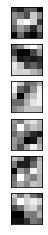

313/313 [==============================] - 4s 12ms/step - loss: 0.0457 - accuracy: 0.9896
Test accuracy: 0.9896000027656555


In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# LeNet architecture
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='tanh', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Plot the loss after each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'])
plt.show()

# Display the kernel/filters of the 1st conv layer
filters, biases = model.layers[0].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
n_filters, ix = 6, 1
for i in range(n_filters):
    f = filters[:, :, :, i]
    for j in range(1):
        ax = plt.subplot(n_filters, 1, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
plt.show()

# Show the performance
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


### Task #2
- Classify images into several categories
- Complete a model to classify each image into the 10 classes described below
- Compile and train the model
- Print the summary of the model
- Evaluate the model 
    - Show the model loss and accuracy
    - Plot the train and validation loss
    - For 4 samples from the test set
        - Display the image
        - Print the true label in text
        - Print the output probabilities of all the classes
        - Print the predicted label in text

#### Load the dataset and normalize the pixel values

In [56]:
from skimage.transform import resize

cifar = keras.datasets.cifar10 
(x_train, y_train), (x_test, y_test) = cifar.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train/255.0, x_test/255.0

input_shape = (28, 28, 3)

In [57]:
# Reshape the images
x_train = tf.image.resize(x_train, input_shape[:2])
x_test = tf.image.resize(x_test, input_shape[:2])

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

#### Define the output classes

In [58]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#### Display sample images

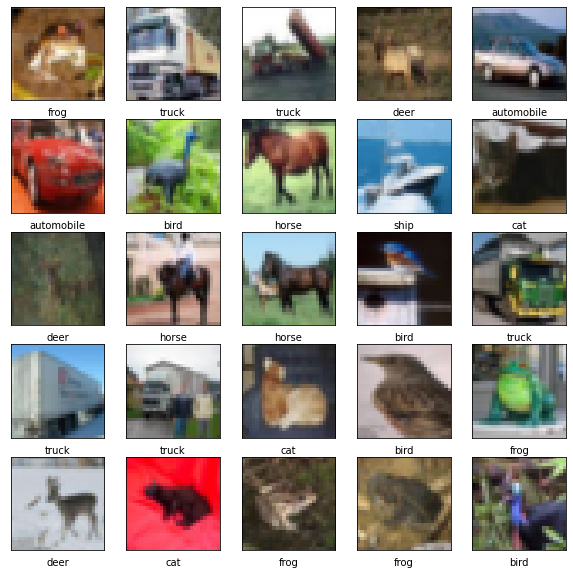

In [59]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

#### Build the model

In [60]:
from tensorflow.keras import datasets, layers, models

model = keras.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(10, activation="softmax"),
    ]
)

#### Train the model and achieve accuracy greater than 75%

- Use validation set

In [63]:
# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.1)

Epoch 1/20
352/352 [==============================] - 45s 125ms/step - loss: 0.6680 - accuracy: 0.7690 - val_loss: 0.9349 - val_accuracy: 0.6916
Epoch 2/20
352/352 [==============================] - 46s 132ms/step - loss: 0.6579 - accuracy: 0.7758 - val_loss: 0.9375 - val_accuracy: 0.6940
Epoch 3/20
352/352 [==============================] - 42s 120ms/step - loss: 0.6533 - accuracy: 0.7760 - val_loss: 0.9546 - val_accuracy: 0.6854
Epoch 4/20
352/352 [==============================] - 44s 125ms/step - loss: 0.6492 - accuracy: 0.7762 - val_loss: 0.9392 - val_accuracy: 0.6944
Epoch 5/20
352/352 [==============================] - 43s 123ms/step - loss: 0.6432 - accuracy: 0.7788 - val_loss: 0.9304 - val_accuracy: 0.6946
Epoch 6/20
352/352 [==============================] - 43s 123ms/step - loss: 0.6439 - accuracy: 0.7774 - val_loss: 0.9390 - val_accuracy: 0.6938
Epoch 7/20
352/352 [==============================] - 42s 121ms/step - loss: 0.6343 - accuracy: 0.7812 - val_loss: 0.9555 - val_ac

#### Print the model summary

In [64]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dense_13 (Dense)            (None, 10)               

#### Evaluate the model

- plot training and validation loss
- print accuracy

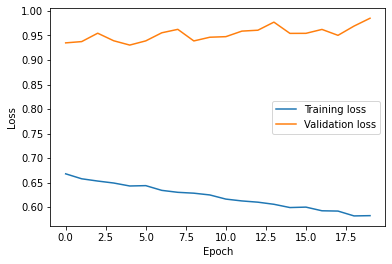

Test accuracy: 0.6776000261306763


In [67]:
# Plot training and validation loss
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

print("Test accuracy:", test_acc)

### Taking 4 samples from the test set 
- display the image
- print the true label
- print the output probability distribution of the classes
- print the predicted class

Image : 1
True label: frog


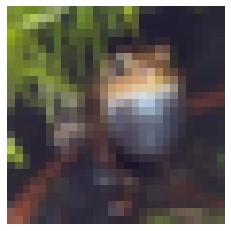

1/1 [==============================] - 0s 31ms/step
Predictions: [[2.3109866e-04 8.1914640e-04 3.9642872e-03 1.1799175e-01 2.6852516e-02
  3.3249851e-02 7.9716885e-01 4.1269814e-03 2.1750765e-04 1.5378087e-02]]
Predicted class: frog
Image : 2
True label: truck


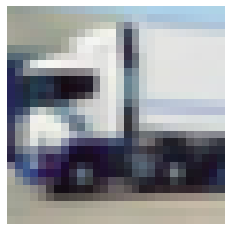

1/1 [==============================] - 0s 29ms/step
Predictions: [[3.9804518e-06 1.4119983e-06 1.9771920e-10 1.4784293e-07 1.7133183e-06
  1.3256389e-08 1.1542196e-09 7.4888609e-05 4.7403264e-05 9.9987042e-01]]
Predicted class: truck
Image : 3
True label: horse


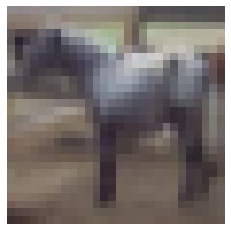

1/1 [==============================] - 0s 29ms/step
Predictions: [[2.5969531e-02 1.8671682e-02 6.1330106e-03 1.2471029e-02 2.6055610e-01
  1.3925726e-04 1.4399991e-03 6.7280972e-01 9.8280019e-05 1.7114239e-03]]
Predicted class: horse
Image : 4
True label: bird


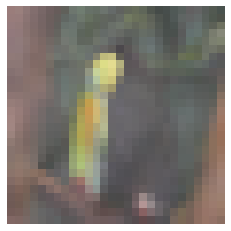

1/1 [==============================] - 0s 28ms/step
Predictions: [[1.4718773e-04 1.0470565e-05 9.3930310e-01 9.5043601e-03 5.9250593e-03
  2.5880873e-02 9.8215034e-03 4.7536260e-03 4.6185064e-04 4.1919947e-03]]
Predicted class: bird


In [76]:
# Taking 4 samples from the test set
sample_indexes = np.random.choice(range(len(x_test)), size=4, replace=False)
x_test = np.array(x_test)
y_test = np.array(y_test)
sample_images = x_test[sample_indexes]
sample_labels = y_test[sample_indexes]

for i in range(len(sample_images)):
    print("Image :", i + 1)
    print("True label:", class_names[np.argmax(sample_labels[i])])        

    # Display the image
    plt.imshow(sample_images[i])
    plt.axis("off")
    plt.show()
    
    # Print the output probability distribution of the classes
    predictions = model.predict(np.array([sample_images[i]]))
    print("Predictions:", predictions)
    
    # Print the predicted class
    predicted_class = np.argmax(predictions)
    print("Predicted class:", class_names[predicted_class])